In [3]:
using DataFrames, CSV, Plots, GLM, Statistics, StatsPlots, MLBase, Distributions, StatsBase, StatsModels, HypothesisTests

In [4]:
cd("/Users/ning/Library/Mobile Documents/com~apple~CloudDocs/Working_Directory/Tex_MD/Teaching/tutorial/6002/W6/")

In [5]:
df = CSV.read("TRAFFIC2.csv", DataFrame);

In [6]:
names(df)

48-element Vector{String}:
 "year"
 "totacc"
 "fatacc"
 "injacc"
 "pdoacc"
 "ntotacc"
 "nfatacc"
 "ninjacc"
 "npdoacc"
 "rtotacc"
 "rfatacc"
 "rinjacc"
 "rpdoacc"
 ⋮
 "prcrfat"
 "lrtotacc"
 "lrfatacc"
 "lntotacc"
 "lnfatacc"
 "prcnfat"
 "lushigh"
 "lcntyrds"
 "lstrtes"
 "spdt"
 "beltt"
 "prcfat_1"

In [7]:
first(df,5)

,year,totacc,fatacc,injacc,pdoacc,ntotacc,nfatacc,ninjacc,npdoacc,rtotacc
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1981,40511,365,15626,24520,38235,323,14743,23169,236
2,1981,36034,329,14469,21236,33989,294,13620,20075,200
3,1981,40328,369,16026,23933,37990,335,15105,22550,253
4,1981,37699,369,15560,21770,35457,326,14654,20477,270
5,1981,38816,355,16546,21915,36611,321,15569,20721,263


In [8]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,Type
1,year,1985.0,1981,1985.0,1989,0,Int64
2,totacc,42831.3,32699,42863.5,52971,0,Int64
3,fatacc,377.935,266,370.0,500,0,Int64
4,injacc,17861.5,13268,17770.5,21741,0,Int64
5,pdoacc,24591.8,19162,24878.0,31425,0,Int64
6,ntotacc,39523.0,30759,39541.0,47874,0,Int64
7,nfatacc,335.306,237,333.0,434,0,Int64
8,ninjacc,16578.8,12492,16489.5,19963,0,Int64
9,npdoacc,22608.9,18030,22926.5,28338,0,Int64


# (a)
# at which observation the variable "beltlaw" turns from $0$ to $1$

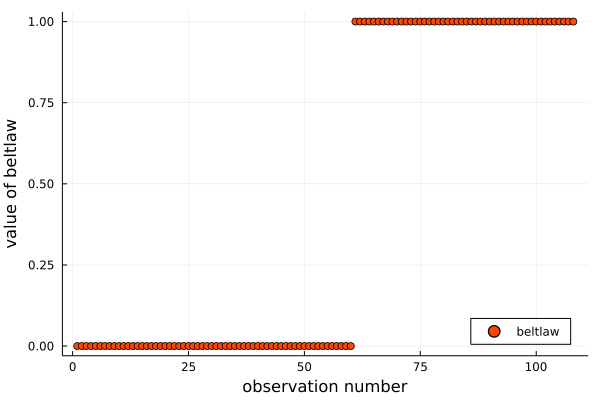

In [9]:
plot(xlabel="observation number", ylabel="value of beltlaw", legend=:bottomright)
scatter!(df.beltlaw, label="beltlaw", color="orangered", linewidth=5)

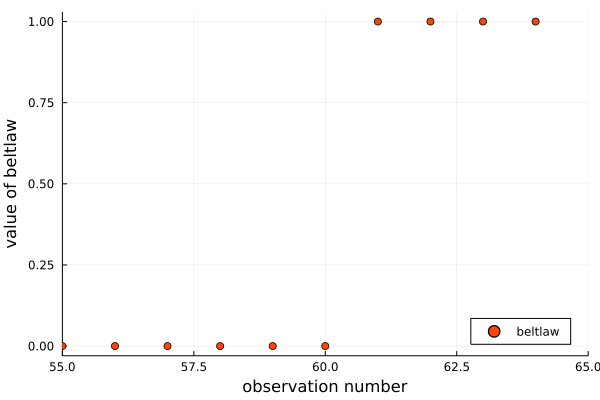

In [10]:
plot(xlabel="observation number", ylabel="value of beltlaw", legend=:bottomright, xlim=(55,65))
scatter!(df.beltlaw, label="beltlaw", color="orangered", linewidth=5)

In [11]:
df[60:62,[:year, :feb, :mar, :apr, :may, :jun, :jul, :aug, :sep, :oct, :nov, :dec, :beltlaw]]

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1985,0,0,0,0,0,0,0,0,0,0,1
2,1986,0,0,0,0,0,0,0,0,0,0,0
3,1986,1,0,0,0,0,0,0,0,0,0,0


# at which observation the variable spdlaw turns from $0$ to $1$

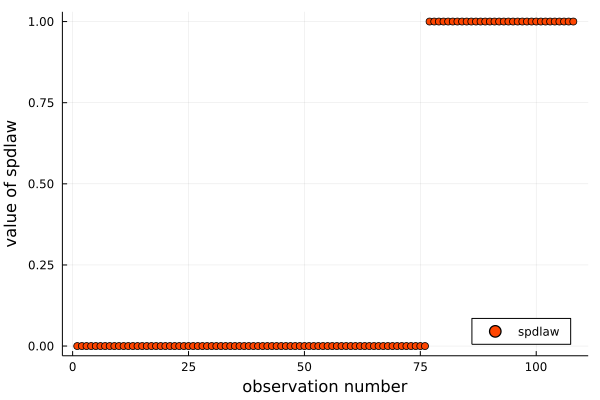

In [12]:
plot(xlabel="observation number", ylabel="value of spdlaw", legend=:bottomright)
scatter!(df.spdlaw, label="spdlaw", color="orangered", linewidth=5)

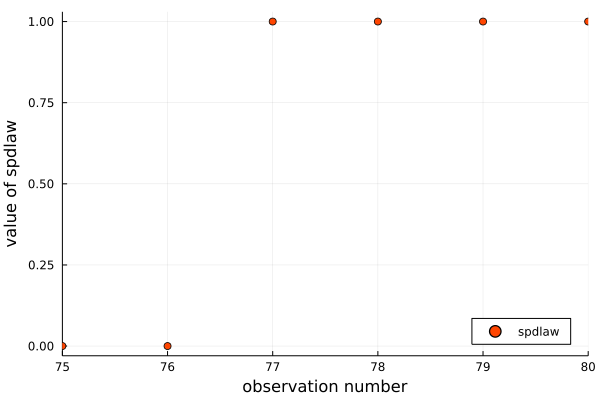

In [13]:
plot(xlabel="observation number", ylabel="value of spdlaw", legend=:bottomright, xlim=(75,80))
scatter!(df.spdlaw, label="spdlaw", color="orangered", linewidth=5)

In [14]:
df[76:78,[:year, :feb, :mar, :apr, :may, :jun, :jul, :aug, :sep, :oct, :nov, :dec, :spdlaw]]

,year,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1987,0,0,1,0,0,0,0,0,0,0,0
2,1987,0,0,0,1,0,0,0,0,0,0,0
3,1987,0,0,0,0,1,0,0,0,0,0,0


# (b)

In [15]:
fm_b  = @formula(ltotacc ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec)
OLS_b = lm(fm_b, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

ltotacc ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  10.4686      0.0190028    550.89    <1e-99  10.4308      10.5063
t             0.00274711  0.000161058   17.06    <1e-29   0.00242737   0.00306686
feb          -0.0426863   0.0244475     -1.75    0.0840  -0.0912207    0.00584803
mar           0.0798244   0.0244491      3.26    0.0015   0.0312869    0.128362
apr           0.0184849   0.0244517      0.76    0.4515  -0.0300579    0.0670277
may           0.032098    0.0244554      1.31    0.1925  -0.0164522    0.080

# (c)

In [16]:
fm_c  = @formula(ltotacc ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw)
OLS_c = lm(fm_c, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

ltotacc ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  10.6399      0.063086    168.66    <1e-99  10.5145       10.7652
t             0.0011011   0.00025787    4.27    <1e-04   0.000588869   0.00161332
feb          -0.0338345   0.0177683    -1.90    0.0600  -0.069129      0.00146005
mar           0.0769529   0.0167941     4.58    <1e-04   0.0435936     0.110312
apr           0.0104562   0.0170469     0.61    0.5412  -0.0234054     0.0443178
may           0.0237073   0.0169389     1

# (e)

In [17]:
describe(df[:,:prcfat])

Summary Stats:
Length:         108
Missing Count:  0
Mean:           0.885636
Minimum:        0.701684
1st Quartile:   0.822868
Median:         0.878098
3rd Quartile:   0.946348
Maximum:        1.216829
Type:           Float64


# (f)

In [18]:
fm_f  = @formula(prcfat ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw)
OLS_f = lm(fm_f, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

prcfat ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem + spdlaw + beltlaw

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   1.0298       0.102952     10.00    <1e-15   0.825296     1.2343
t            -0.00223523   0.000420827  -5.31    <1e-06  -0.00307115  -0.0013993
feb           0.000860744  0.0289967     0.03    0.9764  -0.0567377    0.0584592
mar           9.22612e-5   0.0274069     0.00    0.9973  -0.0543481    0.0545327
apr           0.0582201    0.0278195     2.09    0.0392   0.00296013   0.11348
may           0.0716392    0.0276432     2.59

# (g)

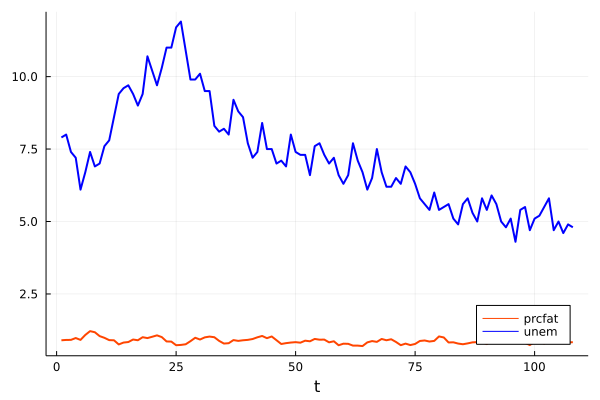

In [19]:
plot(xlabel="t", legend=:bottomright)
plot!(df.prcfat, label="prcfat", color="orangered", linewidth=2)
plot!(df.unem  , label="unem", color="blue", linewidth=2)

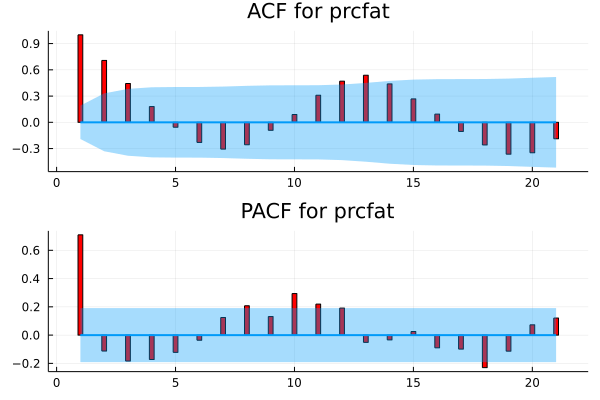

In [73]:
acf_prcfat  = autocor(df.prcfat);
acf2_prcfat = acf_prcfat.^2;
pacf_prcfat = pacf(df.prcfat,[1:1:21;]);

se_acf_prcfat = []

for i in [1:21;]  
    push!(se_acf_prcfat, sqrt((1+2*sum(acf2_prcfat[1:i-1]))/108));   
end

ub_acf_prcfat = se_acf_prcfat * quantile(TDist(dof_residual(OLS_f)), 0.975);
lb_acf_prcfat = se_acf_prcfat * quantile(TDist(dof_residual(OLS_f)), 0.025);

ub_pacf_prcfat = quantile(TDist(dof_residual(OLS_f)), 0.975) / sqrt(108);
lb_pacf_prcfat = quantile(TDist(dof_residual(OLS_f)), 0.025) / sqrt(108);

p1 = bar(acf_prcfat, title = "ACF for prcfat", c = "red", legend = :topright, bar_width = 0.2)
p1 = plot!(zeros(21), ribbon = (ub_acf_prcfat .- lb_acf_prcfat)./2 , fillalpha = 0.35, c = 1, lw = 2)

p2 = bar(pacf_prcfat, title = "PACF for prcfat", c = "red", legend = false, bar_width = 0.2)
p2 = plot!(zeros(21), ribbon = (ub_pacf_prcfat .- lb_pacf_prcfat)./2 , fillalpha = 0.35, c = 1, lw = 2)

plot(p1, p2, layout = (2, 1), legend = false)

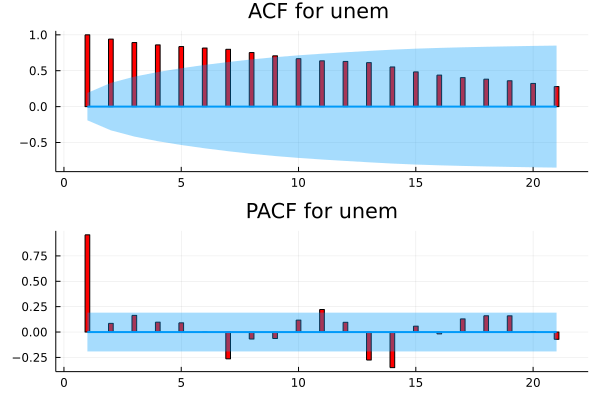

In [72]:
acf_unem  = autocor(df.unem)
acf2_unem = acf_unem.^2;
pacf_unem = pacf(df.unem,[1:1:21;]);

se_acf_unem = []

for i in [1:21;]  
    push!(se_acf_unem, sqrt((1+2*sum(acf2_unem[1:i-1]))/108));   
end

ub_acf_unem = se_acf_unem * quantile(TDist(dof_residual(OLS_f)), 0.975);
lb_acf_unem = se_acf_unem * quantile(TDist(dof_residual(OLS_f)), 0.025);

ub_pacf_unem = quantile(TDist(dof_residual(OLS_f)), 0.975) / sqrt(108);
lb_pacf_unem = quantile(TDist(dof_residual(OLS_f)), 0.025) / sqrt(108);

p1 = bar(acf_unem , title = "ACF for unem ", c = "red", legend = :topright, bar_width = 0.2)
p1 = plot!(zeros(21), ribbon = (ub_acf_unem .- lb_acf_unem)./2 , fillalpha = 0.35, c = 1, lw = 2)

p2 = bar(pacf_unem, title = "PACF for unem", c = "red",legend = false, bar_width = 0.2)
p2 = plot!(zeros(21), ribbon = (ub_pacf_unem .- lb_pacf_unem)./2 , fillalpha = 0.35, c = 1, lw = 2)

plot(p1, p2, layout = (2, 1), legend = false)

# ADF

In [86]:
ADFTest(df.prcfat, :none, 5)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.0050597

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4555

Details:
    sample size in regression:          102
    number of lags:                     5
    ADF statistic:                      -0.597969
    Critical values at 1%, 5%, and 10%: [-2.58675 -1.94375 -1.61457]


In [85]:
ADFTest(df.unem, :none, 5)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -0.00503779

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.4224

Details:
    sample size in regression:          102
    number of lags:                     5
    ADF statistic:                      -0.676672
    Critical values at 1%, 5%, and 10%: [-2.58675 -1.94375 -1.61457]


# (h)

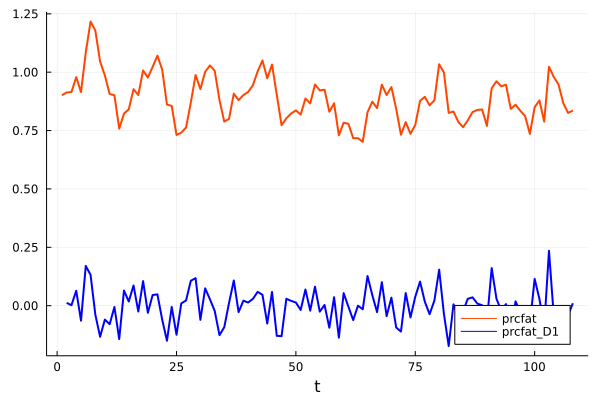

In [93]:
df.prcfat_D1 = df.prcfat - lag(df.prcfat)
df.unem_D1   = df.unem   - lag(df.unem)

plot(xlabel="t", legend=:bottomright)
plot!(df.prcfat   , label="prcfat", color="orangered", linewidth=2)
plot!(df.prcfat_D1, label="prcfat_D1", color="blue", linewidth=2)

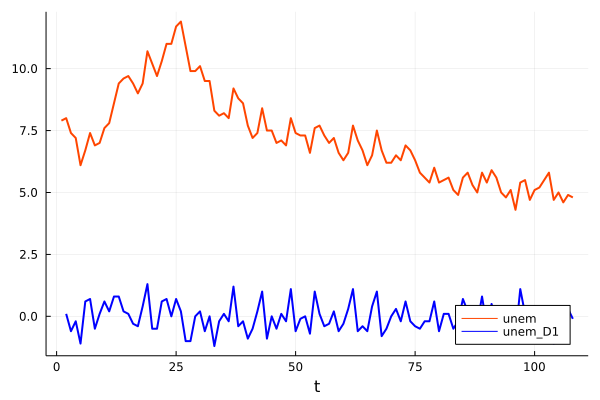

In [94]:
plot(xlabel="t", legend=:bottomright)
plot!(df.unem   , label="unem", color="orangered", linewidth=2)
plot!(df.unem_D1, label="unem_D1", color="blue", linewidth=2)

In [97]:
fm_h  = @formula(prcfat_D1 ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem_D1 + spdlaw + beltlaw)
OLS_h = lm(fm_h, df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

prcfat_D1 ~ 1 + t + feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec + wkends + unem_D1 + spdlaw + beltlaw

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                    Coef.   Std. Error      t  Pr(>|t|)     Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.126868     0.104811     -1.21    0.2293  -0.335094     0.0813581
t             0.000143325  0.000484894   0.30    0.7682  -0.000820001  0.00110665
feb           0.0346228    0.037046      0.93    0.3525  -0.0389755    0.108221
mar           0.0419346    0.0389248     1.08    0.2842  -0.0353964    0.119266
apr           0.0985703    0.0382988     2.57    0.0117   0.022483     0.174658
may           0.0568102    0.0374416

In [75]:
run(`rm -rf W6_Julia.html`)
run(`jupyter nbconvert --to html W6_Julia.ipynb`)

[NbConvertApp] Converting notebook W6_Julia.ipynb to html
[NbConvertApp] Writing 1090450 bytes to W6_Julia.html


Process(`jupyter nbconvert --to html W6_Julia.ipynb`, ProcessExited(0))